<a href="https://colab.research.google.com/github/arun-arunisto/OpenCVTutorial/blob/todo/ComputerVisionTutorial4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h3>Basic Image Enhancement using mathematical Operations</h3>
<p>for computer vision pipelines we are going to use some <b>Arithmetic Operations</b> like addition, multiplication <b>Thresholding</b> & <b>Masking</b> <b>Bitwise Operations</b> like OR, AND, XOR</p>

In [2]:
#importing packages
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

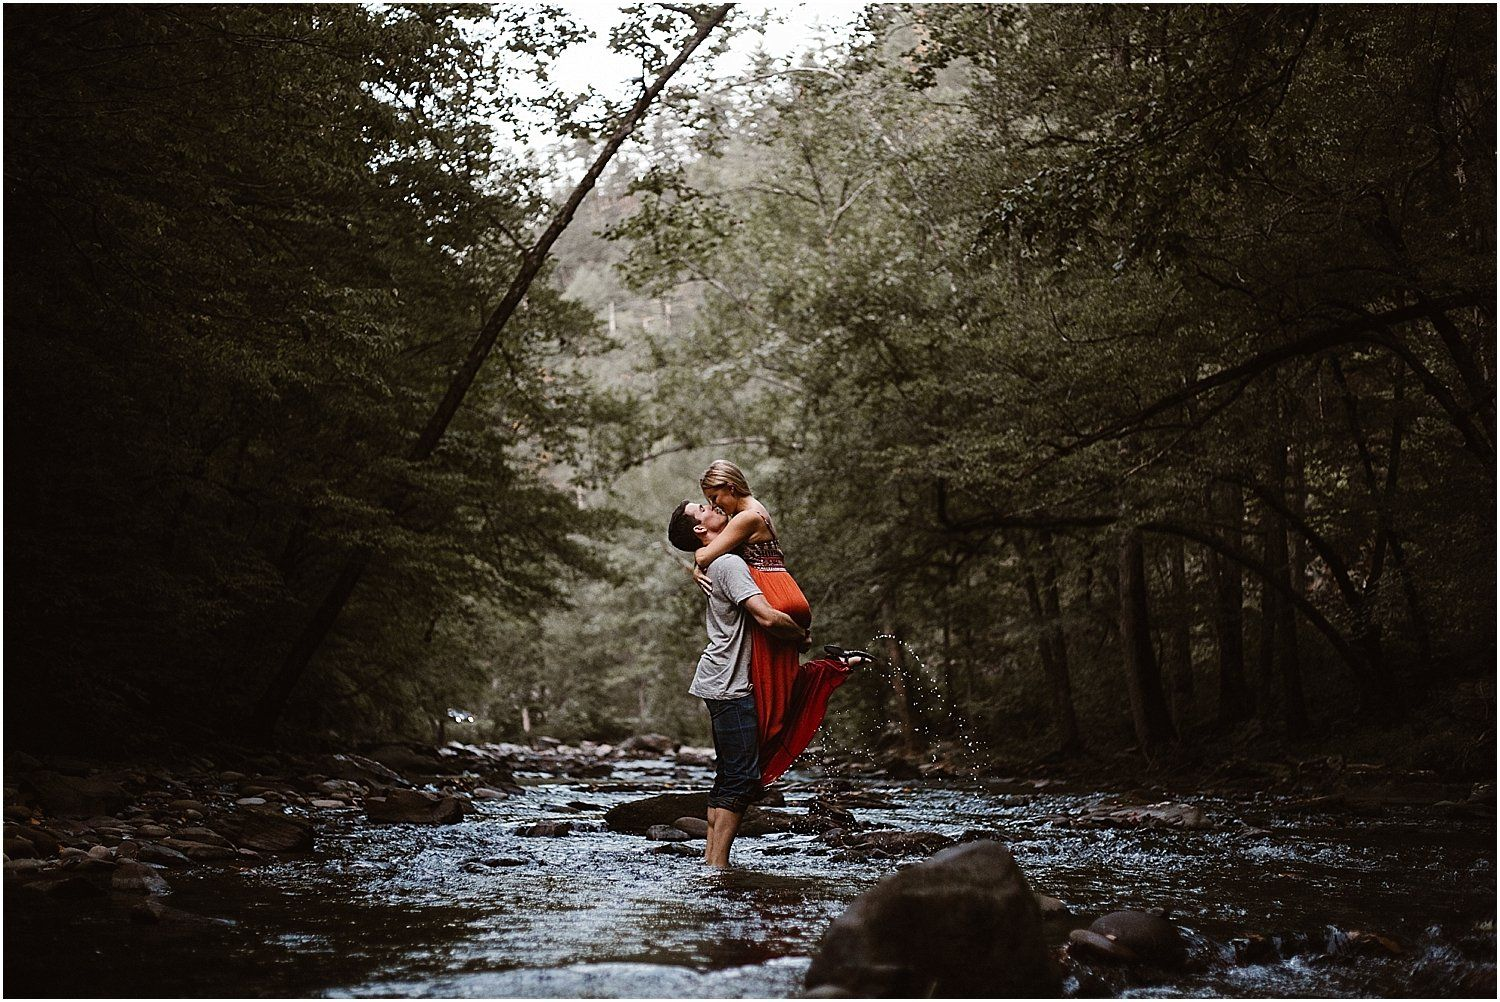

In [ ]:
#original image
Image(filename="/content/drive/MyDrive/ComputerVisionTutorial/ImagesToPractise/couples.jpg")

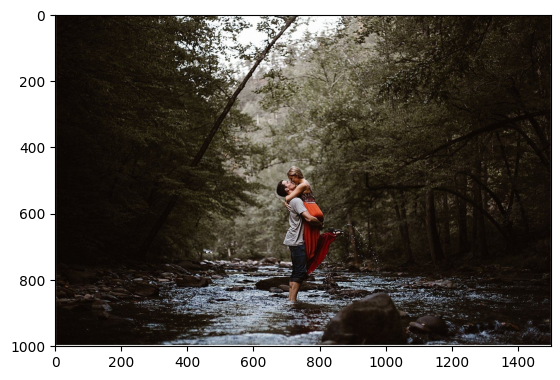

In [ ]:
#img_reading using cv and plt
couple_img = cv.imread("/content/drive/MyDrive/ComputerVisionTutorial/ImagesToPractise/couples.jpg", cv.IMREAD_COLOR)
couple_img_rgb = cv.cvtColor(couple_img, cv.COLOR_BGR2RGB)
plt.imshow(couple_img_rgb)

<h3>Addition or Brightness</h3>
<p>first we are going to do simple addition on images, this results in increasing and decreasing of brightness</p>

In [ ]:
matrix = np.ones(couple_img_rgb.shape, dtype="uint8") * 50
print(matrix)

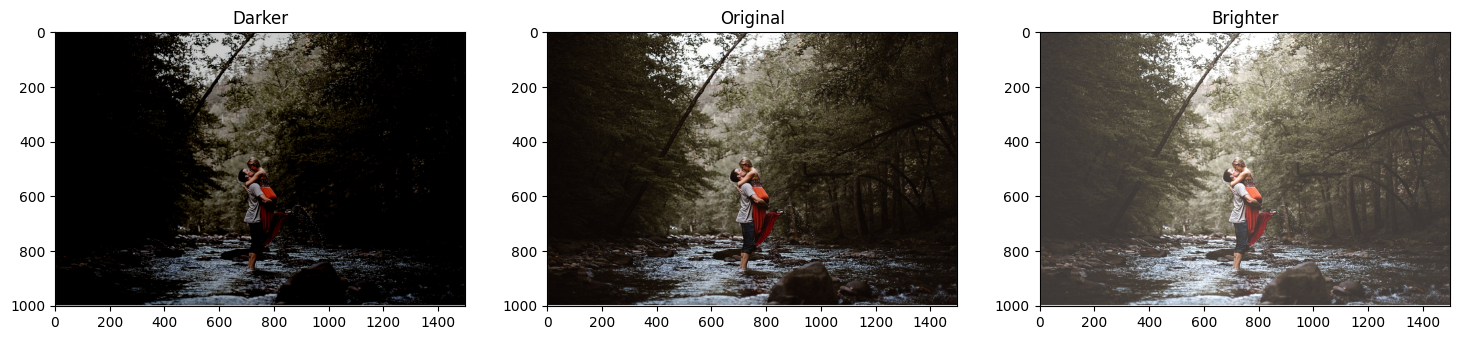

In [ ]:
couple_img_rgb_brighter = cv.add(couple_img_rgb, matrix)
couple_img_rgb_darker = cv.subtract(couple_img_rgb, matrix)

#show the images
plt.figure(figsize=[18, 5])
plt.subplot(131);plt.imshow(couple_img_rgb_darker);plt.title("Darker");
plt.subplot(132);plt.imshow(couple_img_rgb);plt.title("Original");
plt.subplot(133);plt.imshow(couple_img_rgb_brighter);plt.title("Brighter");

<h3>Multiplication or Contrast</h3>
<p>Just like addition it changes brightness, multiplication can be used to improve the contrast of the image</p>

In [ ]:
matrix1 = np.ones(couple_img_rgb.shape) * 0.8
matrix2 = np.ones(couple_img_rgb.shape) * 1.2
print(matrix1)
print(matrix2)

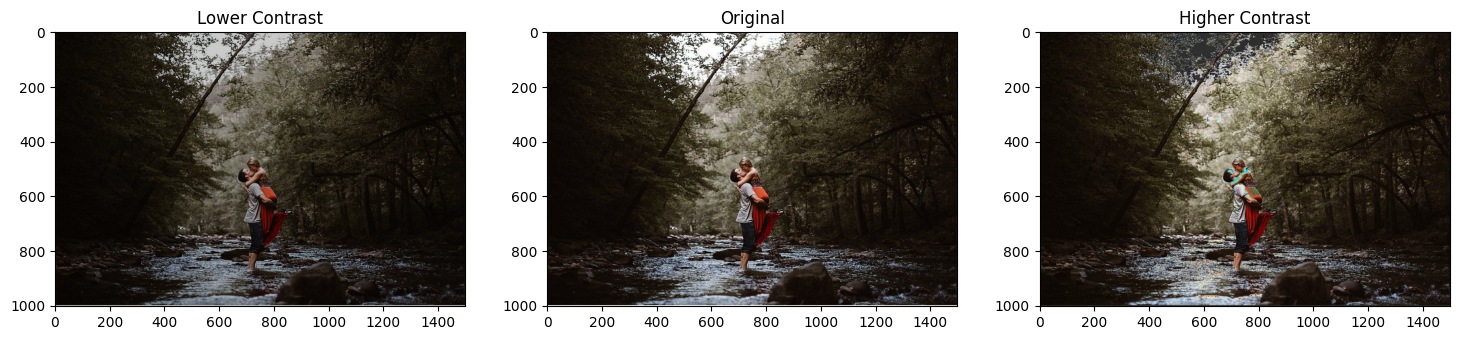

In [ ]:
#contrast
couple_img_rgb_dark = np.uint8(cv.multiply(np.float64(couple_img_rgb), matrix1))
couple_img_rgb_bright = np.uint8(cv.multiply(np.float64(couple_img_rgb), matrix2))

#showing the images
plt.figure(figsize=[18, 5])
plt.subplot(131);plt.imshow(couple_img_rgb_dark);plt.title("Lower Contrast")
plt.subplot(132);plt.imshow(couple_img_rgb);plt.title("Original");
plt.subplot(133);plt.imshow(couple_img_rgb_bright);plt.title("Higher Contrast");

<h3>What happened?</h3>
<p>you can see that some weird colors in some areas of the image, this because after multiplication the values will be high they becoming higher than 255, to overcome this issue we are going to use <b>np.clip()</b> function!</p>

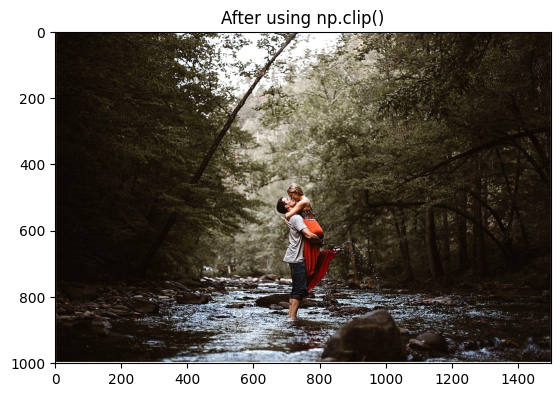

In [ ]:
couple_img_rgb_bright = np.uint8(np.clip(cv.multiply(np.float64(couple_img_rgb), matrix2), 0, 255))
plt.imshow(couple_img_rgb_bright);plt.title("After using np.clip()");

<h3>Image Thresholding</h3>
<p>binary images have a lot use case in image processing most use cases is creating image masks. Image thresholding is used to create binary images from grayscale images. you can create different binary images from the same original image, for that we are going to use <b>cv2.threshold()</b> function</p>
<h4>Function Syntax</h4>
<p><b>retval, dst = cv2.threshold(src, thresh, maxval, type[, dst])</b>
<br><b>dst</b>: the output have same size and type and the same number of channel as <b>src</b><br>
<b>the function required 4 arguments.</b><ol>
<li><b>src</b>: src image</li>
<li><b>thresh</b>: threshold value</li>
<li><b>maxval</b>: maximum value to use the <b>THRESH_BINARY</b> and <b>THRESH_BINARY_INV</b> thresholding types</li>
<li><b>type</b>: thresholding type(see ThresholdTypes)</li>
</ol>
</p>
<h4>Function Syntax</h4>
<p><b>dst = cv2.adaptiveThreshold(src, maxValue, adaptiveMethod, thresholdType, blockSize, C[, dst])</b><br><b>dst</b>: destination image of the same size, and type of src
<br><b>The function has 6 required arguments</b><br>
<ol>
<li><b>src</b>: source 8-bit single channel image</li>
<li><b>maxValue</b>: non-zero value assigned to the pixels for the condition is satisfied</li>
<li><b>adaptiveMethod</b>: Adaptive thresholding algortihm to use, see AdaptiveThresholdTypes. the <b>BORDER_REPLICATE</b> | <b>BORDER_ISOLATED</b> is used to process boundaries</li>
<li><b>thresholdType</b>: thresholding type that must be either <b>THRESH_BINARY</b> or <b>THRESH_BINARY_INV</b>, see ThresholdTypes</li>
<li><b>blockSize</b>: size of a pixel neighborhood that is used to calculate a thresh value for the pixel: 3, 5, 7 and so on.</li>
<li><b>C</b>: constant substracted from the mean or weighted mean, normally it is positive but may be zero or negative as well</li>
</ol></p>

Text(0.5, 1.0, 'Threshold Image')

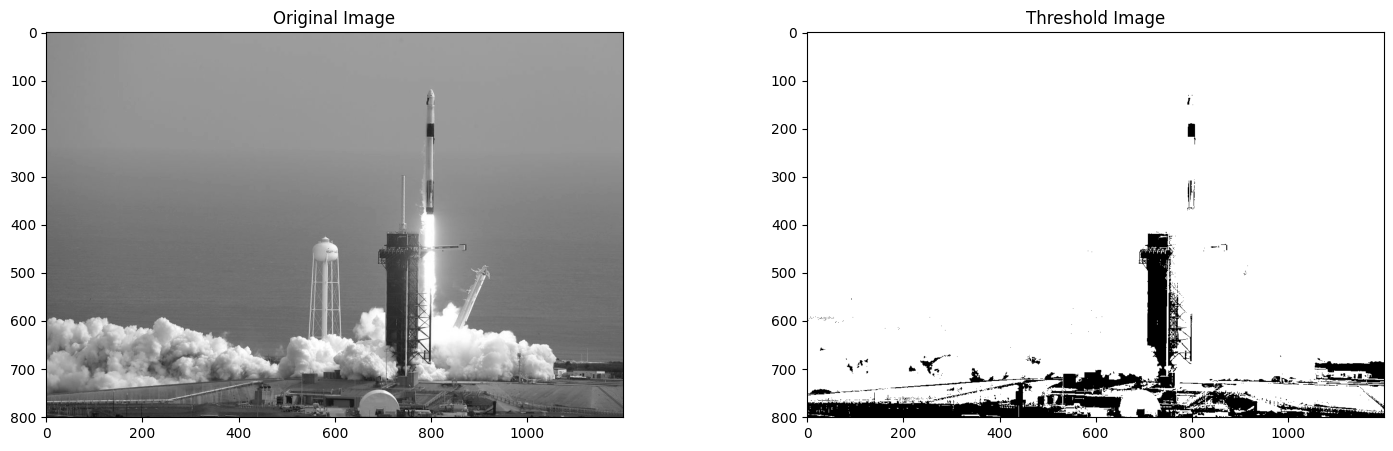

In [ ]:
falcon_img_gray = cv.imread("/content/drive/MyDrive/ComputerVisionTutorial/ImagesToPractise/falcon9.jpg", cv.IMREAD_GRAYSCALE)
retval, falcon_thresh = cv.threshold(falcon_img_gray, 100, 255, cv.THRESH_BINARY)

#show the images using plt
plt.figure(figsize=[18, 5])
plt.subplot(121);plt.imshow(falcon_img_gray, cmap="gray");plt.title("Original Image")
plt.subplot(122);plt.imshow(falcon_thresh, cmap="gray");plt.title("Threshold Image")


<h3>Application: Last Supper Thresholding</h3>
<p>separating images from the background, this task can be accomplished with thresholding techniques. and also it's using for text recognigtion like (OCR - Optical Character Recognigition)</p>

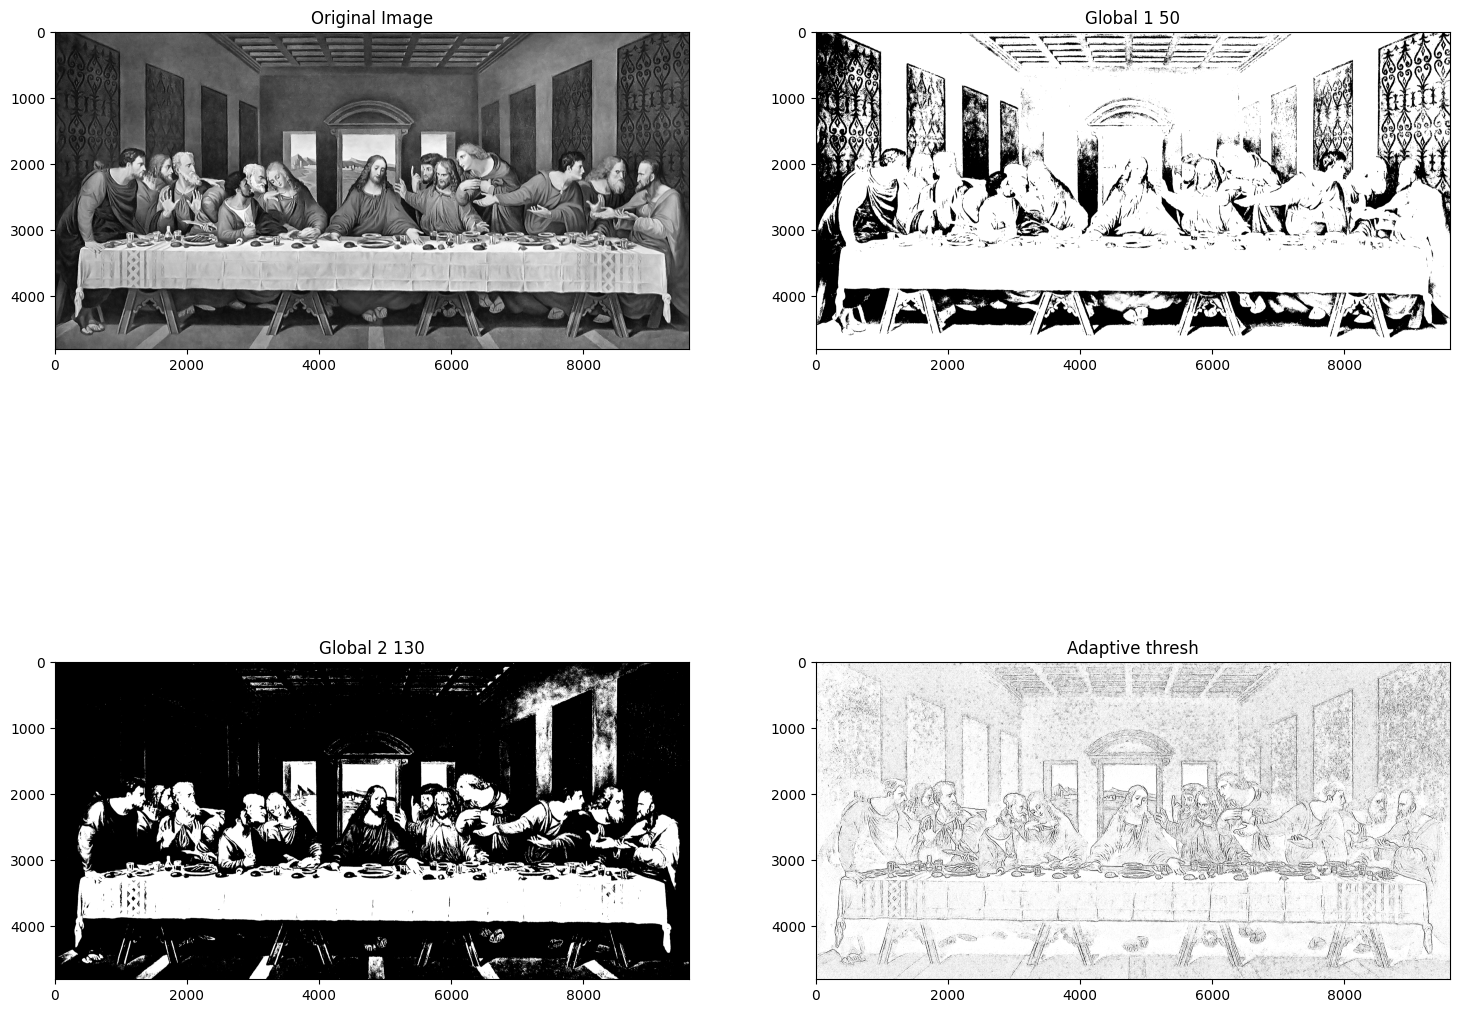

In [5]:
#reading the original image
last_supper_gray = cv.imread("/content/drive/MyDrive/ComputerVisionTutorial/ImagesToPractise/lastsupper.jpg", cv.IMREAD_GRAYSCALE)

#performing global thresholding
retval, last_supper_gbl_1 = cv.threshold(last_supper_gray, 50, 255, cv.THRESH_BINARY)

#performing global thresholding
retval, last_supper_gbl_2 = cv.threshold(last_supper_gray, 130, 255, cv.THRESH_BINARY)

#perform adaptive thresholding
last_supper_adapt = cv.adaptiveThreshold(last_supper_gray, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 7)


#showing the images
plt.figure(figsize=[18, 15])
plt.subplot(221);plt.imshow(last_supper_gray, cmap="gray");plt.title("Original Image");
plt.subplot(222);plt.imshow(last_supper_gbl_1, cmap="gray");plt.title("Global 1 50");
plt.subplot(223);plt.imshow(last_supper_gbl_2, cmap="gray");plt.title("Global 2 130");
plt.subplot(224);plt.imshow(last_supper_adapt, cmap="gray");plt.title("Adaptive thresh");

<h3>Bitwise Operations</h3>
<p><b>cv2.bitwise_and()</b>, <b>cv2.bitwise_or()</b>, <b>cv2.bitwise_xor()</b>, <b>cv2.bitwise_not()</b></p>
<h4>Function Syntax</h4>
<p><b>dst = cv2.bitwise_and(src1, src2[, dst[, mask]])</b>
<br>
<b>The function has required 2 arguments</b>
<ol>
<li><b>src1</b>: first input array or a scalar</li>
<li><b>src2</b>: second input array or a scalar</li>
</ol>
<b>and one important optional argument is <br>
<ul>
<li><b>mask</b>: optional operation mask, 8bit single channel array, that specifies elements of the output array to be changed</li>
</ul></b></p>

(1080, 1920, 3)
(1080, 1920, 3)


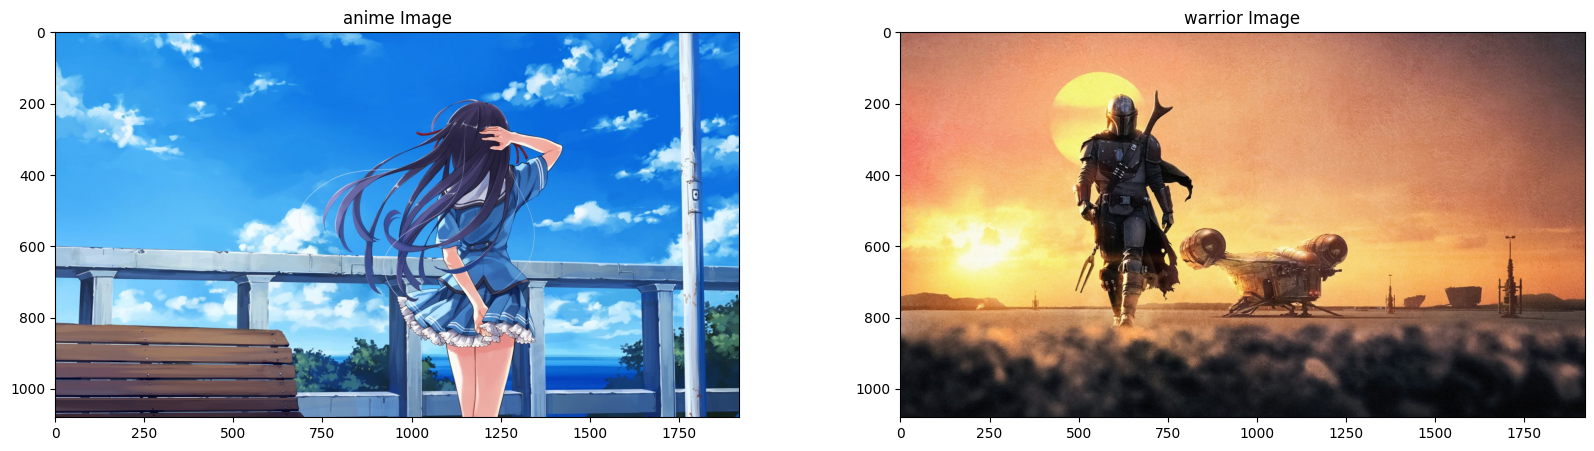

In [18]:
anime_img = cv.imread("/content/drive/MyDrive/ComputerVisionTutorial/ImagesToPractise/anime_1920.jpg", cv.IMREAD_COLOR)
warrior_img = cv.imread("/content/drive/MyDrive/ComputerVisionTutorial/ImagesToPractise/warrior_1920.jpg", cv.IMREAD_COLOR)
anime_img = cv.cvtColor(anime_img, cv.COLOR_BGR2RGB)
warrior_img = cv.cvtColor(warrior_img, cv.COLOR_BGR2RGB)
plt.figure(figsize=[20, 5])
plt.subplot(121);plt.imshow(anime_img);plt.title("anime Image");
plt.subplot(122);plt.imshow(warrior_img);plt.title("warrior Image");
print(anime_img.shape)
print(warrior_img.shape)

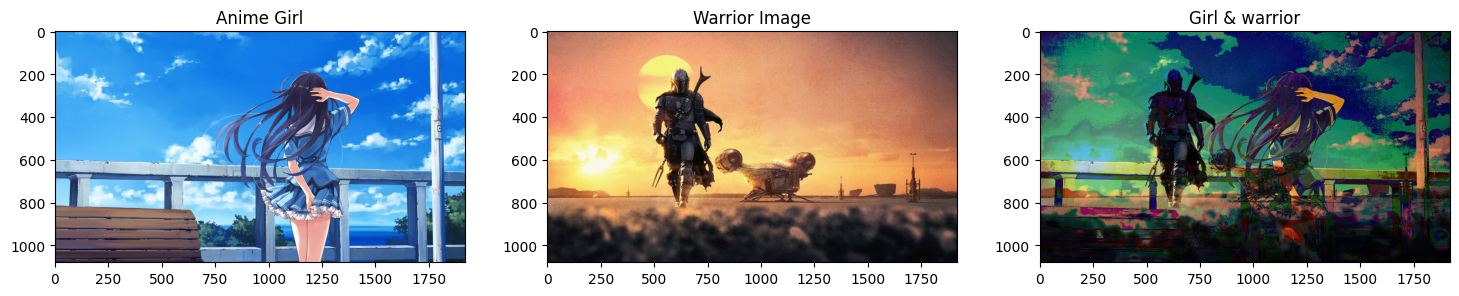

In [22]:
#bitwise AND operator
result_and = cv.bitwise_and(anime_img, warrior_img, mask=None)

plt.figure(figsize=[18, 5])

plt.subplot(131);plt.imshow(anime_img);plt.title("Anime Girl");
plt.subplot(132);plt.imshow(warrior_img);plt.title("Warrior Image");
plt.subplot(133);plt.imshow(result_and);plt.title("Girl & warrior");

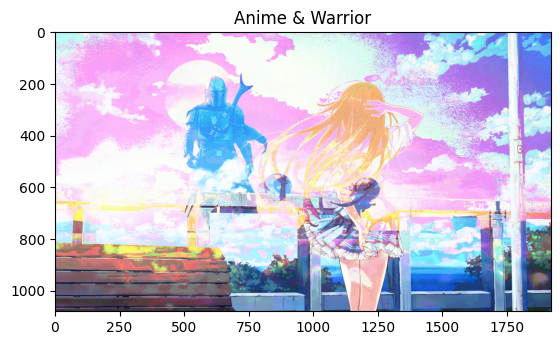

In [23]:
#bitwise OR operator
result_or = cv.bitwise_or(anime_img, warrior_img, mask=None)
plt.imshow(result_or);plt.title("Anime & Warrior");

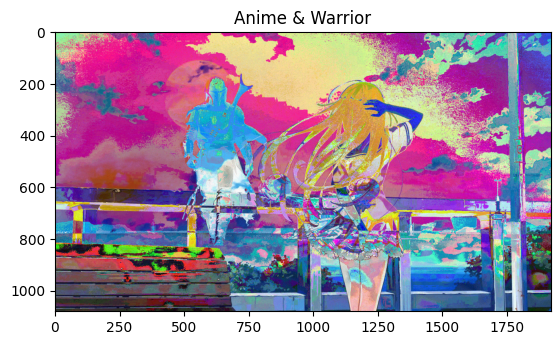

In [24]:
#bitwise_XOR
result_xor = cv.bitwise_xor(anime_img, warrior_img, mask=None)
plt.imshow(result_xor);plt.title("Anime & Warrior");

<h3>Application Image Manipulation</h3>
<p>Lettering image with a another image</p>

(1080, 1920, 3)
Width : 1080
Height : 1920


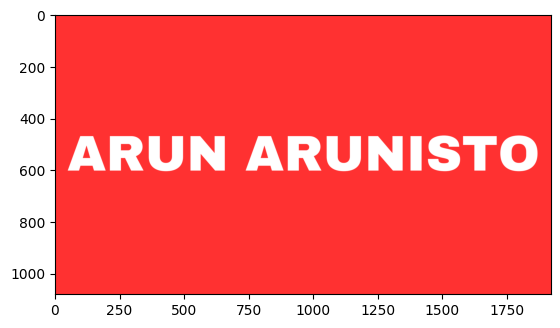

In [29]:
arunisto_img = cv.imread("/content/drive/MyDrive/ComputerVisionTutorial/ImagesToPractise/ARUN ARUNISTO.png")
arunisto_img = cv.cvtColor(arunisto_img, cv.COLOR_BGR2RGB)
plt.imshow(arunisto_img)
print(arunisto_img.shape)
arunisto_img_w = arunisto_img.shape[0]
arunisto_img_h = arunisto_img.shape[1]
print("Width :",arunisto_img_w)
print("Height :",arunisto_img_h)

(1080, 1920, 3)


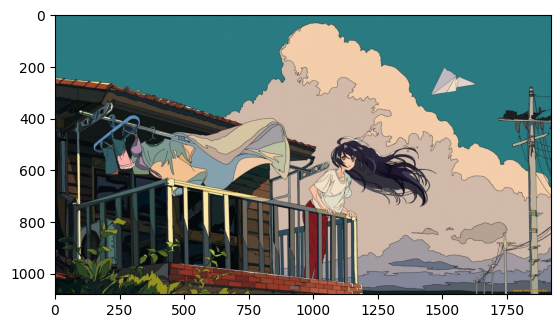

In [31]:
#reading background image
background_img = cv.imread("/content/drive/MyDrive/ComputerVisionTutorial/ImagesToPractise/[1920x1080].jpg")
background_img = cv.cvtColor(background_img, cv.COLOR_BGR2RGB)
print(background_img.shape)
plt.imshow(background_img)

In [ ]:
"""
in case the two image size not same you need to fix it by the following code

aspect_ratio = arunisto_w / background_img.shape[1]
dimension = (arunisto_w, int(background_img.hape[0] * aspect_ratio))
background_img = cv.resize(background_img, dimension, interpolation=cv.INTER_AREA)

"""

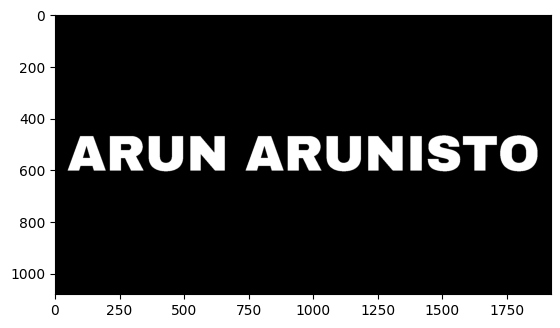

In [32]:
#creating mask for original image
arunisto_gray = cv.cvtColor(arunisto_img, cv.COLOR_RGB2GRAY)
retval, arunisto_mask = cv.threshold(arunisto_gray, 127, 255, cv.THRESH_BINARY)
plt.imshow(arunisto_mask, cmap="gray")

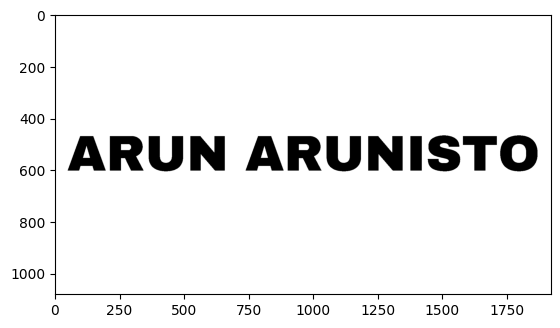

In [33]:
#inverting the mask
arunisto_mask_inv = cv.bitwise_not(arunisto_mask)
plt.imshow(arunisto_mask_inv, cmap="gray")

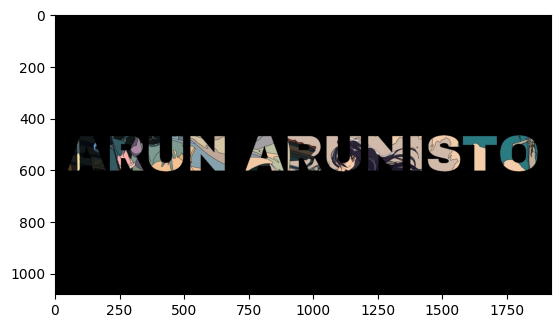

In [34]:
#applying background on the mask
background_img = cv.bitwise_and(background_img, background_img, mask=arunisto_mask)
plt.imshow(background_img)

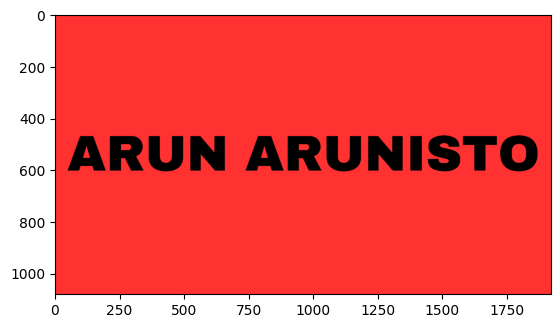

In [35]:
#isolateing foreground from image
foreground_img = cv.bitwise_and(arunisto_img, arunisto_img, mask=arunisto_mask_inv)
plt.imshow(foreground_img)

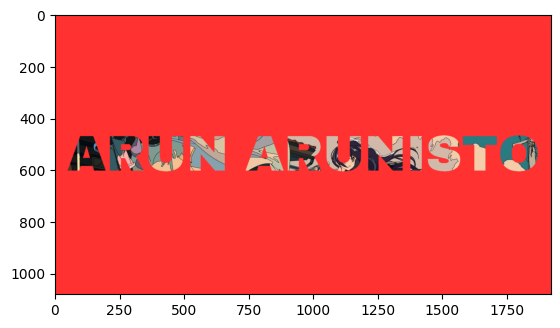

In [36]:
#merging foreground and background
final = cv.add(background_img, foreground_img)
plt.imshow(final)

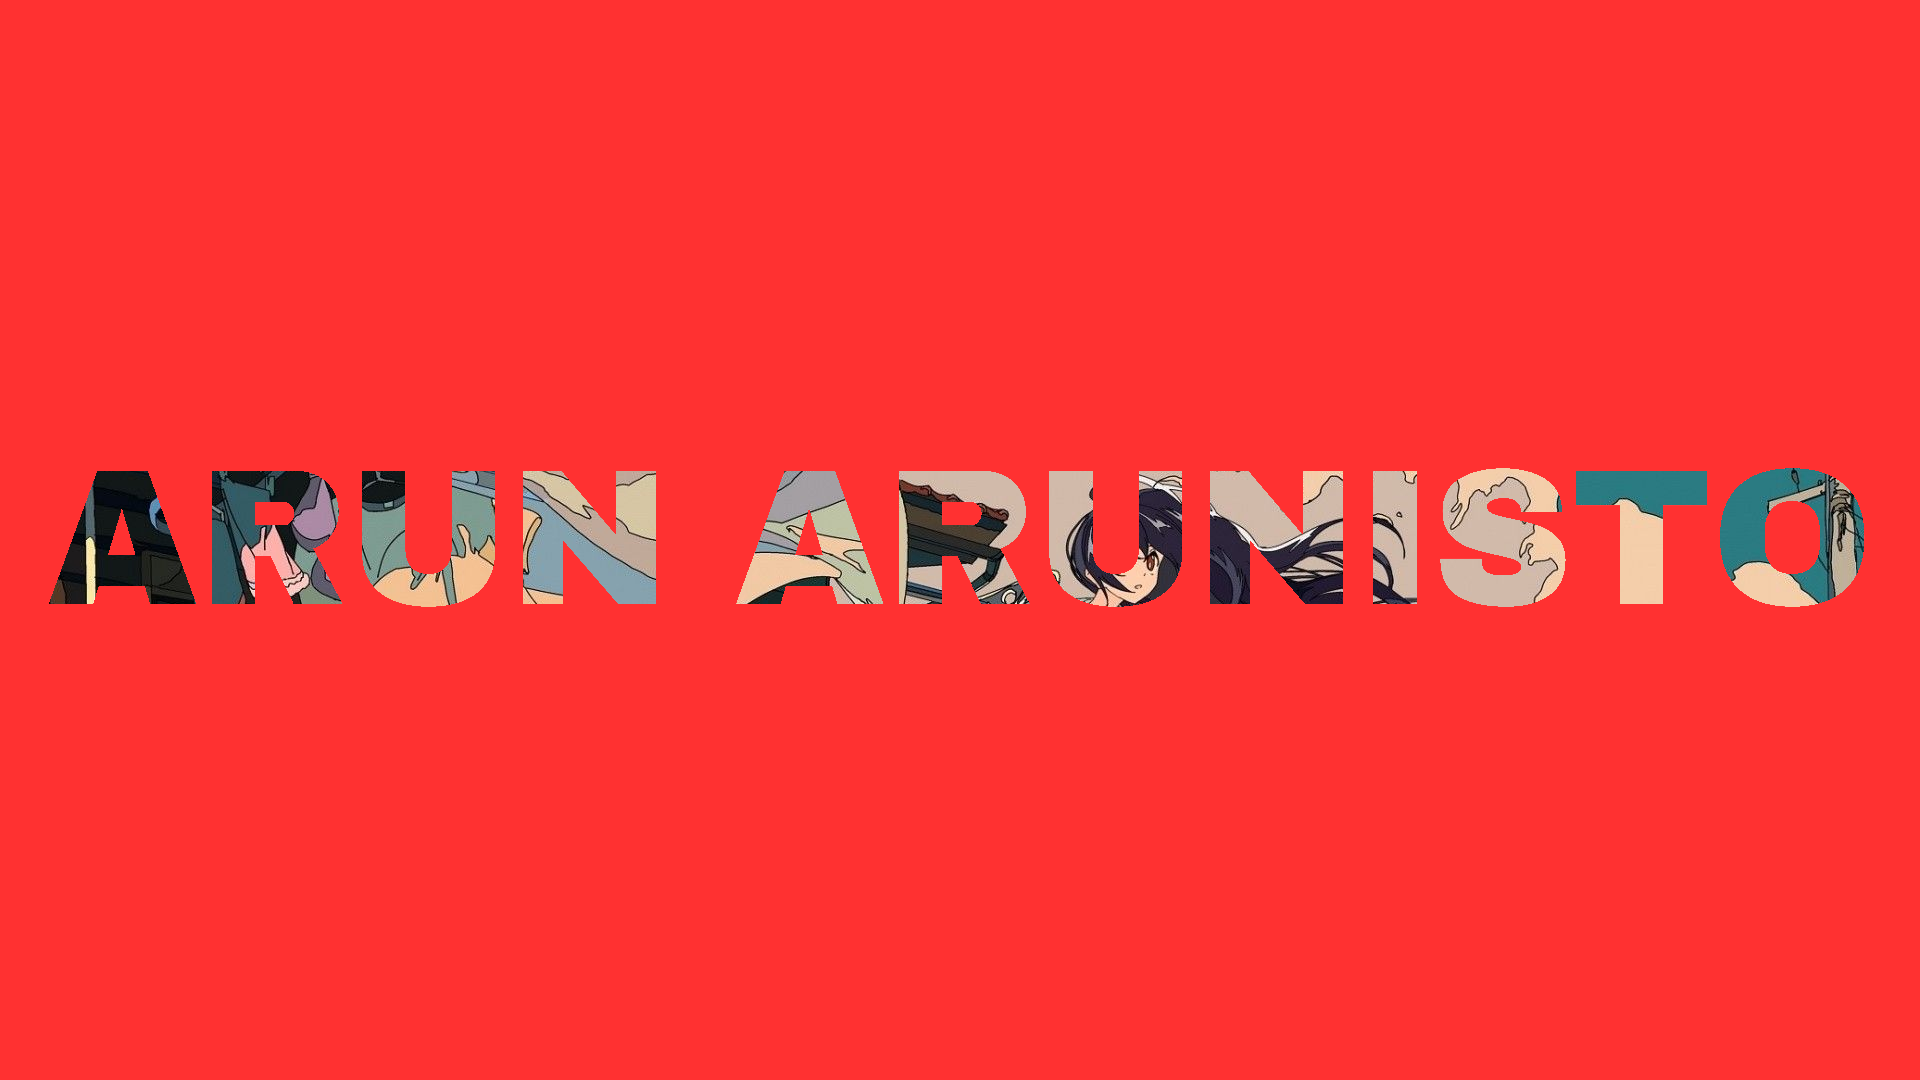

In [39]:
#save the image
cv.imwrite("arun_arunisto.png", final[:, :, ::-1])
Image(filename="arun_arunisto.png")